In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#Reading the dataset
data=pd.read_csv("/content/googleplaystore_user_reviews.csv")

In [3]:
data.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(37427, 5)

In [7]:
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Positive,Negative,Neutral
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.534,0.0,0.466
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.519,0.0,0.481
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.451,0.0,0.549
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.677,0.0,0.323
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.808,0.0,0.192


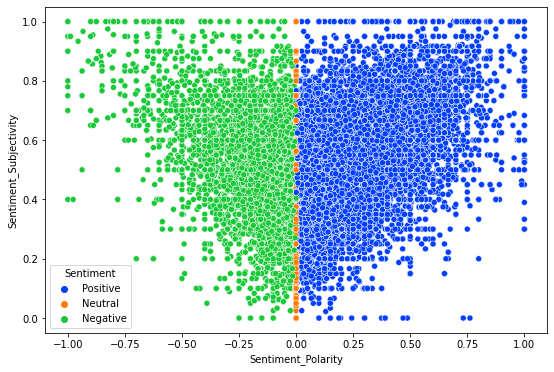

In [8]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data["Sentiment_Polarity"],y=data["Sentiment_Subjectivity"], hue=data["Sentiment"],palette="bright")
plt.show()

In [9]:
data=data[['Translated_Review','Sentiment']]
data.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


In [10]:
data.isnull().sum()

Translated_Review    0
Sentiment            0
dtype: int64

In [11]:
data.rename(columns = {'Translated_Review':'review', 'Sentiment':'sentiment'}, inplace = True)
data.head()

,review,sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


In [12]:
data['sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: sentiment, dtype: int64

In [13]:
data['sentiment'] = data['sentiment'].map({'Positive':0, 'Negative': 1,'Neutral':2})
data.head()

,review,sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0


In [14]:
data['sentiment'].value_counts()

0    23998
1     8271
2     5158
Name: sentiment, dtype: int64

In [15]:
for i in range(0,20):
  print(data['review'].values[i])

I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
This help eating healthy exercise regular basis
Works great especially going grocery store
Best idea us
Best way
Amazing
Looking forward app,
It helpful site ! It help foods get !
good you.
Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.
Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)
Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!
Good health...... Good health first priority.......
Health It's important world either life . think? :)
Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body
Very Useful in diabetes age 30. I need control sugar. thanks
One greatest apps.
good nice
Healthy Really helped
God health


In [16]:
stemmer = PorterStemmer()
stop = stopwords.words('english')

def clean_text(text):
    # Remove non alphabets
    text = re.sub('[^a-zA-Z ]+', ' ', text)

    # Lowercase and split
    text = text.lower().split()

    # Remove stopwords and short words
    text = [stemmer.stem(word) for word in text if word not in stop and len(word) > 2]

    # Join and Return
    return ' '.join(text)

In [17]:
review = data['review'].apply(clean_text)
sentiment=data['sentiment']

In [18]:
review

0        like eat delici food cook food case best food ...
1                    help eat healthi exercis regular basi
3                       work great especi go groceri store
4                                                best idea
5                                                 best way
                               ...                        
64222    ad older mani agent much owner post detail rep...
64223    photo post portal load fit purpos sure storag ...
64226    dumb app want post properti rent give option w...
64227    properti busi got link sm happi perform still ...
64230    useless app search flat kondapur hyderabad non...
Name: review, Length: 37427, dtype: object

In [19]:
sentiment

0        0
1        0
3        0
4        0
5        0
        ..
64222    0
64223    0
64226    1
64227    0
64230    1
Name: sentiment, Length: 37427, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(review, sentiment, random_state = 0)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
review_train = tfidf.fit_transform(x_train).todense()
review_test = tfidf.transform(x_test).todense()

In [22]:
tfidf.get_feature_names()[:20]


['aaa',
 'aaaaaaa',
 'aaaaaaaaaa',
 'aaadddsss',
 'aaand',
 'aah',
 'aaid',
 'aamiin',
 'aap',
 'aarav',
 'aargh',
 'aavantag',
 'ab',
 'aback',
 'abad',
 'abandon',
 'abandonwar',
 'abb',
 'abbi',
 'abbrevi']

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(review_train, y_train)
nb_predict = nb.predict(review_test)

print("Prediction:",nb_predict)
print("\n")
nb_conf_matrix  = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",nb_acc_score*100,'\n')
print(classification_report(y_test, nb.predict(review_test)))


Prediction: [0 0 1 ... 0 0 0]


confusion matrix
[[5940   12    0]
 [1637  461    0]
 [1242   18   47]]


Accuracy of Logistic Regression: 68.91097574008764 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      5952
           1       0.94      0.22      0.36      2098
           2       1.00      0.04      0.07      1307

    accuracy                           0.69      9357
   macro avg       0.87      0.42      0.41      9357
weighted avg       0.78      0.69      0.60      9357



In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(review_train, y_train)
rf_predict = rf.predict(review_test)

print("Prediction:",rf_predict)
print("\n")
rf_conf_matrix  = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of RandomForestClassifier:",rf_acc_score*100,'\n')
print(classification_report(y_test, rf.predict(review_test)))


Prediction: [2 0 1 ... 1 0 0]


confusion matrix
[[5788   59  105]
 [ 579 1461   58]
 [ 256   18 1033]]


Accuracy of RandomForestClassifier: 88.51127498129743 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5952
           1       0.95      0.70      0.80      2098
           2       0.86      0.79      0.83      1307

    accuracy                           0.89      9357
   macro avg       0.90      0.82      0.85      9357
weighted avg       0.89      0.89      0.88      9357



In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(review_train, y_train)
pac_predict = pac.predict(review_test)

print("Prediction:",pac_predict)
print("\n")
pac_conf_matrix  = confusion_matrix(y_test, pac_predict)
pac_acc_score = accuracy_score(y_test, pac_predict)
print("confusion matrix")
print(pac_conf_matrix)
print("\n")
print("Accuracy of RandomForestClassifier:",pac_acc_score*100,'\n')
print(classification_report(y_test, pac.predict(review_test)))


Prediction: [2 1 1 ... 1 0 0]


confusion matrix
[[5432  358  162]
 [ 214 1823   61]
 [ 167  125 1015]]


Accuracy of RandomForestClassifier: 88.3830287485305 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5952
           1       0.79      0.87      0.83      2098
           2       0.82      0.78      0.80      1307

    accuracy                           0.88      9357
   macro avg       0.85      0.85      0.85      9357
weighted avg       0.89      0.88      0.88      9357

